# #3 Linear Algebra

## Identity and Inverse Matrices


This notebook and the others from this series focus on review important concepts of Linear Algebra, such knowledge are very important to understand further Deep Learning concepts.
This material is the same available By Hadrien Jean in [KDnuggets](https://www.kdnuggets.com/2018/05/boost-data-science-skills-learn-linear-algebra.html).


*This content is also part of a series following the chapter 2 on linear algebra from the Deep Learning Book by Goodfellow, I., Bengio, Y., and Courville, A.*


**@notebook_author: [Juarez Monteiro](https://jrzmnt.github.io).**

---

# Identity Matrices

The identity matrix $\boldsymbol{I}_n$ is a special matrix of shape $(n \times n)$ that is filled with 0 except the diagonal that is filled with 1.

<!--<img src="https://hadrienj.github.io/assets/images/2.3/identity-matrix.png" width="200px" height="200px" />-->

$$
I=
\begin{bmatrix}
    1\space\space\space & 0\space\space\space & 0 \\
    0\space\space\space & 1\space\space\space & 0 \\
    0\space\space\space & 0\space\space\space & 1 
\end{bmatrix}
$$

An identity matrix can be created with the Numpy function eye():

```python
numpy.eye()
```


In [1]:
import numpy as np

In [2]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

When 'apply' the identity matrix to a vector the result is this same vector: $$\boldsymbol{I}_n \space\boldsymbol{x}=\boldsymbol{x}$$

We can see an example bellow:

$$
\begin{bmatrix}
    1 & 0 & 0 \\\\
    0 & 1 & 0 \\\\
    0 & 0 & 1 
\end{bmatrix}
\times
\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    x_3
\end{bmatrix}
=
\begin{bmatrix}
    1 \times x_1 & 0 \times x_2 & 0 \times x_3 \\\\
    0 \times x_1 & 1 \times x_2 & 0 \times x_3 \\\\
    0 \times x_1 & 0 \times x_2 & 1 \times x_3 
\end{bmatrix}
=
\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    x_3 \\
\end{bmatrix}
$$

In [3]:
x = np.array([[2],[6],[3]])
x

array([[2],
       [6],
       [3]])

In [4]:
xid = np.eye(x.shape[0]).dot(x)
xid

array([[2.],
       [6.],
       [3.]])

## Intuition

You can think of a matrix as a way to transform objects in a n-dimensional space. It applies a linear transformation of the space. We can say that we apply a matrix to an element: this means that we do the dot product between this matrix and the element. We will see this notion thoroughly in the next chapters but the identity matrix is a good first example. It is a particular example because the space doesn’t change when we apply the identity matrix to it.

We saw that $\boldsymbol{x}$ was not altered after being multiplied by $\boldsymbol{I}$.

> ### *The space doesn’t change when we apply the identity matrix to it.*

## Inverse Matrices

The matrix inverse of $\boldsymbol{A}$ is denoted $\boldsymbol{A}^{-1}$.
It is the matrix that results in the identity matrix when it is multiplied by $\boldsymbol{A}$:

$$\boldsymbol{A}^{-1}\boldsymbol{A}=\boldsymbol{I}_n$$

This means that if we apply a linear transformation to the space with $\boldsymbol{A}$, it is possible to go back with $\boldsymbol{A}^{-1}$.
It provides a way to cancel the transformation.

*E.g.:*
$$
A=
\begin{bmatrix}
    3 & 0 & 2 \\\\
    2 & 0 & -2 \\\\
    0 & 1 & 1 
\end{bmatrix}
$$

For this example, we will use the Numpy function ```linalg.inv()``` to calculate the inverse of $\boldsymbol{A}$.
Let's start by creating $\boldsymbol{A}$:

In [5]:
A = np.array([[3,0,2], [2,0,-2], [0,1,1]])
A

array([[ 3,  0,  2],
       [ 2,  0, -2],
       [ 0,  1,  1]])

Now we calculte its inverse:

In [6]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.2,  0.2,  0. ],
       [-0.2,  0.3,  1. ],
       [ 0.2, -0.3, -0. ]])

We can check that $\boldsymbol{A_{inv}}$ is well the inverse of $\boldsymbol{A}$ with Python:

In [10]:
A_bis = A_inv.dot(A)
A_bis

array([[ 1.00000000e+00,  0.00000000e+00, -1.11022302e-16],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

We will see that inverse of matrices can be very usefull, for instance to solve a set of linear equations. We must note however that **non square matrices** (matrices with more columns than rows or more rows than columns) **don’t have inverse**.

## Solving a system of linear equations

The inverse matrix can be used to solve the equation $\boldsymbol{Ax=b}$ by adding it to each term:

$$\boldsymbol{A^{-1}Ax = A^{-1}b}$$

Since we know by definition that $\boldsymbol{A^{-1}A = I}$, we have:

$$\boldsymbol{x=A^{-1}b}$$

This is great! We can solve a set of linear equation just by computing the inverse of $\boldsymbol{A}$ and apply this matrix to the vector of results $\boldsymbol{b}$.

We will take a simple solvable example:

$$
\begin{cases}
y = 2x\\\\
y = -x+3
\end{cases}
$$

We will use the follow notation:

$$
\begin{cases}
A_{1,1} x_1 + A_{1,2} x_2 = b_1 \\\\
A_{2,1} x_1 + A_{2,2} x_2 = b_2
\end{cases}
$$

Our matrix $\boldsymbol{A}$ of weights is:

$$
\boldsymbol{A} =
\begin{bmatrix}
2\space\space &-1\\\\
1\space\space &1
\end{bmatrix}
$$

And the vector ***b*** containing the solutions of individual equations is:

$$
\boldsymbol{b}=
\begin{bmatrix}
0\\\\
3
\end{bmatrix}
$$


Under the matrix form, our systems becomes:

$$
\begin{bmatrix}
2 & -1\\\\
1 & 1
\end{bmatrix}
\begin{bmatrix}
x_1\\\\
x_2
\end{bmatrix}
=
\begin{bmatrix}
0\\\\
3
\end{bmatrix}
$$


Let's find the inverse of ***A***:

In [11]:
A = np.array([[2, -1], [1,1]])
A

array([[ 2, -1],
       [ 1,  1]])

In [13]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.33333333,  0.33333333],
       [-0.33333333,  0.66666667]])

We have also:

In [16]:
b = np.array([[0],[3]])
b

array([[0],
       [3]])

Since we saw that $$\boldsymbol{x = A^{-1}b}$$

We have:

In [18]:
x = A_inv.dot(b)
x

array([[1.],
       [2.]])

### This is our solution!

$$
\boldsymbol{x=}
\begin{bmatrix}
1 \\\\
2
\end{bmatrix}
$$

This means that the point of coordinates (1, 2) is the solution and is at the intersection of the lines representing the equations. 

Let’s plot them to check this solution:

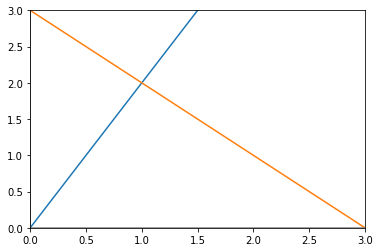

In [28]:
import matplotlib.pyplot as plt

x = np.arange(-10,10)
y = 2*x
y1 = -x + 3

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(0, 3)
plt.ylim(0, 3)

# draw axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

We can see that the solution (corresponding to the line crossing) is when $x=1$ and $y=2$. 

It confirms what we found with the matrix inversion!